In [116]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [117]:
import numpy as np
import pandas as pd

In [118]:
import datetime as dt
from datetime import timedelta

# Reflect Tables into SQLAlchemy ORM

In [119]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [120]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [121]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [122]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [123]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [124]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [125]:
data=engine.execute("SELECT max(date) from measurement")
for record in data:
    print(record)

('2017-08-23',)


In [126]:
record.items()

[('max(date)', '2017-08-23')]

In [127]:
conn=engine.connect()

In [128]:
data=engine.execute("SELECT max(date),prcp from measurement")
for record in data:
    print(record)

('2017-08-23', 0.0)


In [129]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
prcp_data=pd.read_sql("SELECT date,prcp from measurement WHERE date <= '2017-08-23' AND date >= '2016-08-23'",conn)
prcp_data.sort_values(by=['date'],inplace=True,ascending=True)
prcp_data.dropna()

,date,prcp
0,2016-08-23,0.00
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
1881,2016-08-23,0.70
...,...,...
1527,2017-08-22,0.00
1008,2017-08-23,0.00
360,2017-08-23,0.00
1528,2017-08-23,0.08


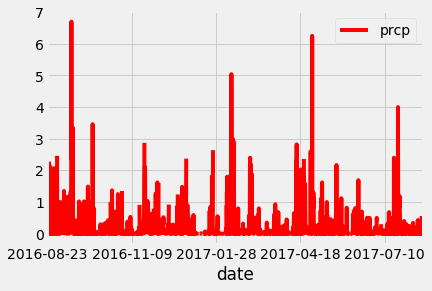

In [130]:
prcp_data.plot(x='date', y='prcp', color='red')

In [131]:
# station_data=pd.read_sql("SELECT * FROM station",conn)
# station_data.head()

In [132]:
# comb_data=pd.merge(measurement_data,station_data, on = 'station')
# comb_data

In [133]:


# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [134]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_data.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![precipitation](Images/precipitation.png)

![describe](Images/describe.png)

In [135]:
# Calculate the date 1 year ago from the last data point in the database
# data=engine.execute("SELECT max(date) from measurement")
# for record in data:
#     print(record)

In [136]:
# t=data
# d = dt.date(*(int(s) for s in t.split('-')))

In [137]:
# a_date = dt.date(2010,1,1)
# days = dt.timedelta(5)
# new_date = a_date - days
# print(new_date)

In [138]:
# Design a query to show how many stations are available in this dataset?
station_data=pd.read_sql("SELECT count(station) FROM station",conn)
station_data.head()


,count(station)
0,9


In [139]:
station_data=pd.read_sql("SELECT * FROM station",conn)
station_data.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [140]:
measurement_data=pd.read_sql("SELECT * FROM measurement",conn)
measurement_data.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [141]:
 comb_data=pd.merge(measurement_data,station_data, on = 'station')
 comb_data

,id_x,station,date,prcp,tobs,id_y,name,latitude,longitude,elevation
0,1,USC00519397,2010-01-01,0.08,65.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00519397,2010-01-02,0.00,63.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
2,3,USC00519397,2010-01-03,0.00,74.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
3,4,USC00519397,2010-01-04,0.00,76.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
4,5,USC00519397,2010-01-06,NaN,73.0,1,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
...,...,...,...,...,...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0,9,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
19546,19547,USC00516128,2017-08-20,NaN,78.0,9,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
19547,19548,USC00516128,2017-08-21,0.56,76.0,9,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4
19548,19549,USC00516128,2017-08-22,0.50,76.0,9,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4


In [142]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
c_d=comb_data['station'].value_counts()
c_d

USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
Name: station, dtype: int64

In [143]:
max_station=c_d[[0]]
max_station

USC00519281    2772
Name: station, dtype: int64

In [144]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
temp_min=pd.read_sql("SELECT station,min(tobs),max(tobs),avg(tobs) FROM measurement WHERE station='USC00519281'",conn)
temp_min

,station,min(tobs),max(tobs),avg(tobs)
0,USC00519281,54.0,85.0,71.663781


In [150]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
max_obs=pd.read_sql("SELECT station,count(tobs) FROM measurement GROUP BY station ORDER BY count(tobs)DESC",conn)
max_obs

,station,count(tobs)
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [151]:
year_max_st=pd.read_sql("SELECT tobs FROM measurement WHERE station='USC00519281' AND '2017-08-23' AND date >= '2016-08-23'",conn)
year_max_st

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0
...,...
347,77.0
348,77.0
349,76.0
350,76.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002061B2ADD08>]],
      dtype=object)

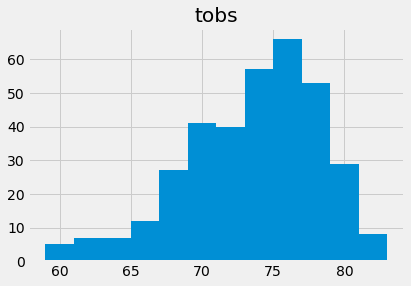

In [153]:
 year_max_st.hist(bins=12)

![precipitation](Images/station-histogram.png)

In [25]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [26]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [27]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [28]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [29]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [30]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [31]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [32]:
# Plot the daily normals as an area plot with `stacked=False`
